<a href="https://colab.research.google.com/github/Soomin-Maxwell/Medical_AI_study/blob/main/Otsu_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vb = Between Class Variance  <br>
Vt = Total Class Variance <br>
Vw = Within Calss Variance <br>

In [134]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import warnings

#from google.colab import files
#uploaded = files.upload()

In [159]:
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
flatten_img = img.flatten()
print(img.shape)
print(img.shape[0]*img.shape[1])
print(len(flatten_img)) # Total Pixel numbers

(458, 846)
387468
387468


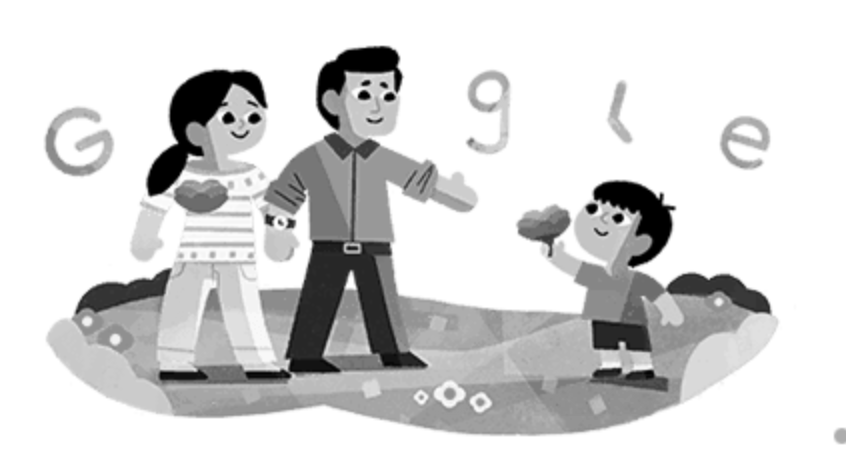

In [160]:
cv2_imshow(img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


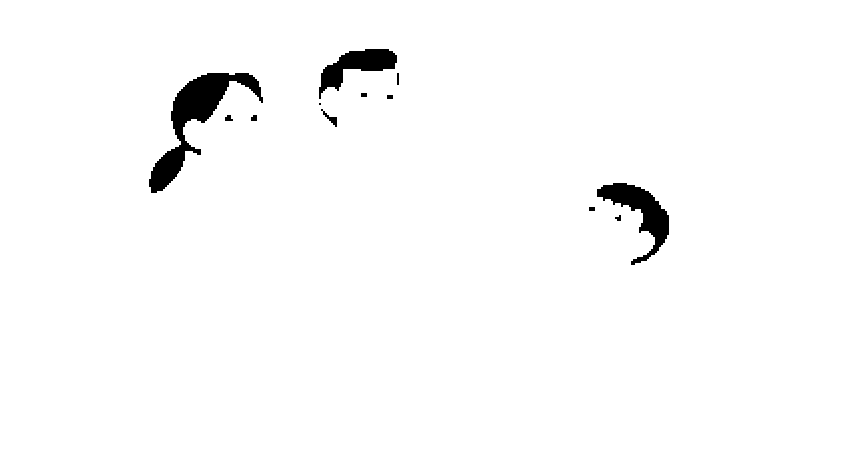

0.0


In [163]:
hist = cv2.calcHist([img],[0], None, [255], [0,255])
#print(hist)

within = [] 

for i in range(len(hist)) :
  x,y = np.split(hist, [i])
  x1 = np.sum(x) // (img.shape[0] * img.shape[1])  # weight of class 1
  y1 = np.sum(y) // (img.shape[0] * img.shape[1])
  x2 = np.sum([j*t for j,t in enumerate(x)]) // np.sum(x) # mean of class 2
  y2 = np.sum([j*t for j,t in enumerate(y)]) // np.sum(y)
  x3 = np.sum([(j-x2) **2 *t for j,t in enumerate(x)]) / np.sum(x) #variance of class1
  y3 = np.sum([(j-y2) **2 *t for j,t in enumerate(y)]) / np.sum(y)
  x3 = np.nan_to_num(x3)
  within.append(x1*x3 + y1*y3)
m = np.argmin(within)


thresh, Bin = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY)

cv2_imshow(Bin)
print(thresh)
 

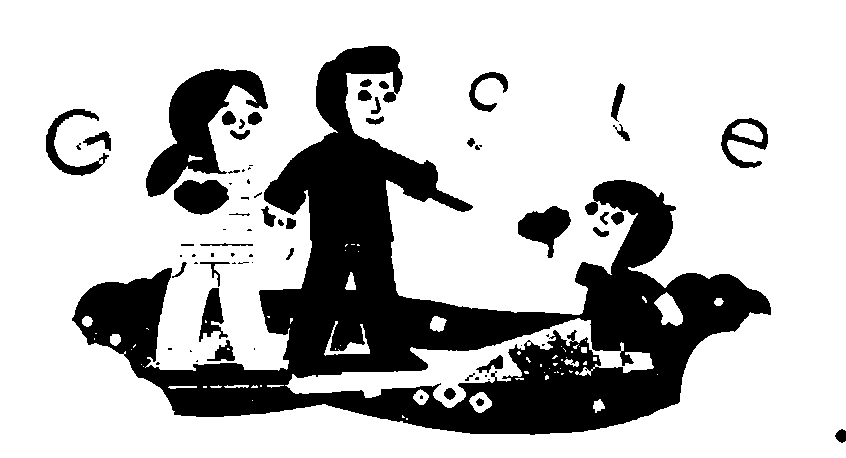

181.0


In [164]:

ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(th2)
print(ret2)